In [1]:
from PIL import Image, ImageChops
from skimage.metrics import structural_similarity as ssim
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.decomposition import PCA


In [2]:
def bandingkan_gambar(gambar1_path, gambar2_path):
    img1 = Image.open(gambar1_path)
    img2 = Image.open(gambar2_path)

    if img1.size != img2.size:
        print("Ukuran gambar berbeda")
        return False

    # Selisih gambar
    diff = ImageChops.difference(img1, img2)

    if diff.getbbox():
        print("Gambar berbeda")
        diff.show()
        return False
    else:
        print("Gambar identik")
        return True

bandingkan_gambar("original.png", "encoded.png")

Gambar berbeda


False

In [3]:
def bandingkan_ssim(gambar1_path, gambar2_path):
    img1 = cv2.imread(gambar1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(gambar2_path, cv2.IMREAD_GRAYSCALE)

    ssim_score, diff = ssim(img1, img2, full=True)
    print(f"Skor SSIM: {ssim_score:.4f}")  # Semakin mendekati 1, semakin mirip

bandingkan_ssim("original.png", "encoded.png")

Skor SSIM: 0.9984


In [4]:
def bandingkan_histogram(gambar1_path, gambar2_path):
    img1 = cv2.imread(gambar1_path)
    img2 = cv2.imread(gambar2_path)

    hist1 = cv2.calcHist([img1], [0], None, [256], [0, 256])
    hist2 = cv2.calcHist([img2], [0], None, [256], [0, 256])

    similarity = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)
    print(f"Korelasi Histogram: {similarity:.4f}")

bandingkan_histogram("original.png", "encoded.png")

Korelasi Histogram: 1.0000


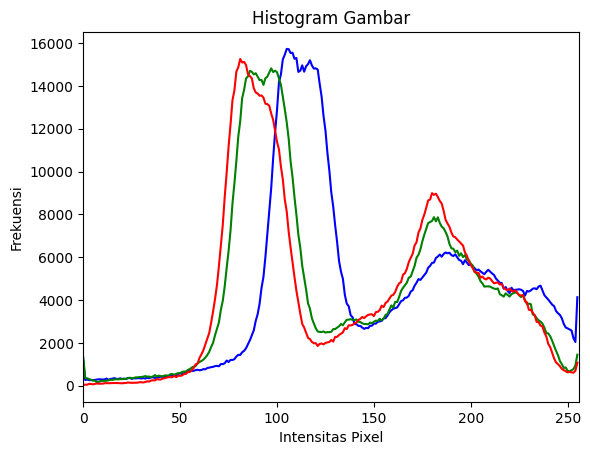

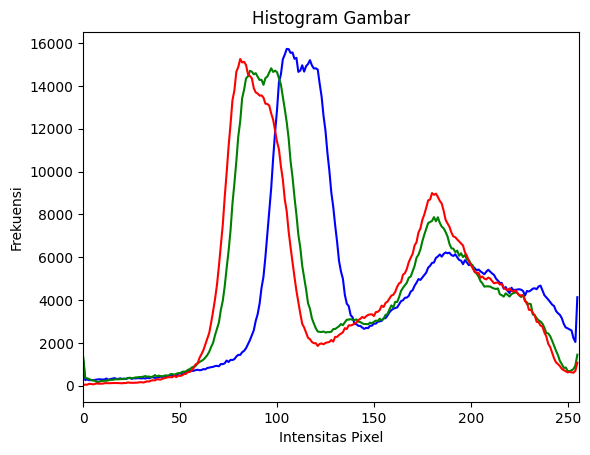

In [5]:
# Visualisasi Histogram
def tampilkan_histogram(gambar_path):
    img = cv2.imread(gambar_path)
    color = ('b', 'g', 'r')

    for i, col in enumerate(color):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
        plt.xlim([0, 256])

    plt.title('Histogram Gambar')
    plt.xlabel('Intensitas Pixel')
    plt.ylabel('Frekuensi')
    plt.show()

tampilkan_histogram("original.png")
tampilkan_histogram("encoded.png")

In [6]:
def load_image(path):
    return Image.open(path).convert('RGB')

def mse(image1, image2):
    """Mean Squared Error"""
    np1 = np.array(image1)
    np2 = np.array(image2)
    err = np.mean((np1 - np2) ** 2)
    return err

def psnr(mse_value, max_pixel=255.0):
    """Peak Signal-to-Noise Ratio"""
    if mse_value == 0:
        return float('inf')
    return 20 * math.log10(max_pixel / math.sqrt(mse_value))

def visualize_difference(image1, image2, output_path='diff.png'):
    """Highlight pixel difference"""
    diff = ImageChops.difference(image1, image2)
    diff.save(output_path)
    print(f"Perbedaan disimpan di {output_path}")

def compare_images(path1, path2):
    img1 = load_image(path1)
    img2 = load_image(path2)

    # Ukuran gambar harus sama
    if img1.size != img2.size:
        print("Ukuran gambar berbeda, tidak bisa dibandingkan.")
        return

    # MSE
    error = mse(img1, img2)
    print(f"MSE: {error:.4f}")

    # PSNR
    psnr_value = psnr(error)
    print(f"PSNR: {psnr_value:.2f} dB")

    # Visualisasi
    visualize_difference(img1, img2)


compare_images('original.png', 'encoded.png')

MSE: 0.0001
PSNR: 90.53 dB
Perbedaan disimpan di diff.png


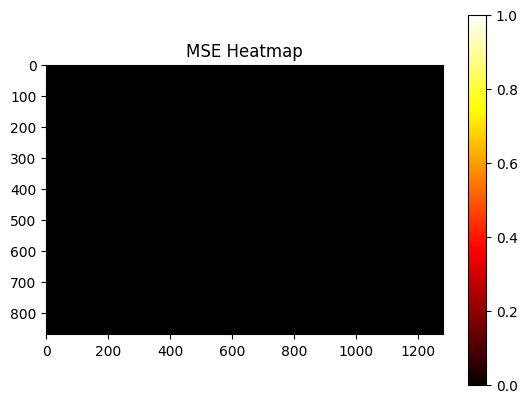

In [7]:
# Visualisasi MSE
def visualize_mse(image1, image2):
    """Visualisasi MSE sebagai heatmap"""
    np1 = np.array(image1)
    np2 = np.array(image2)
    mse_map = (np1 - np2) ** 2
    plt.imshow(mse_map, cmap='hot')
    plt.colorbar()
    plt.title('MSE Heatmap')
    plt.show()

visualize_mse(load_image('original.png'), load_image('encoded.png'))


Pixels: 1112320
Mean: [138 137 149]
Median: [130 118 130]
Mode (approx): (np.int64(81), np.int64(97), np.int64(105))


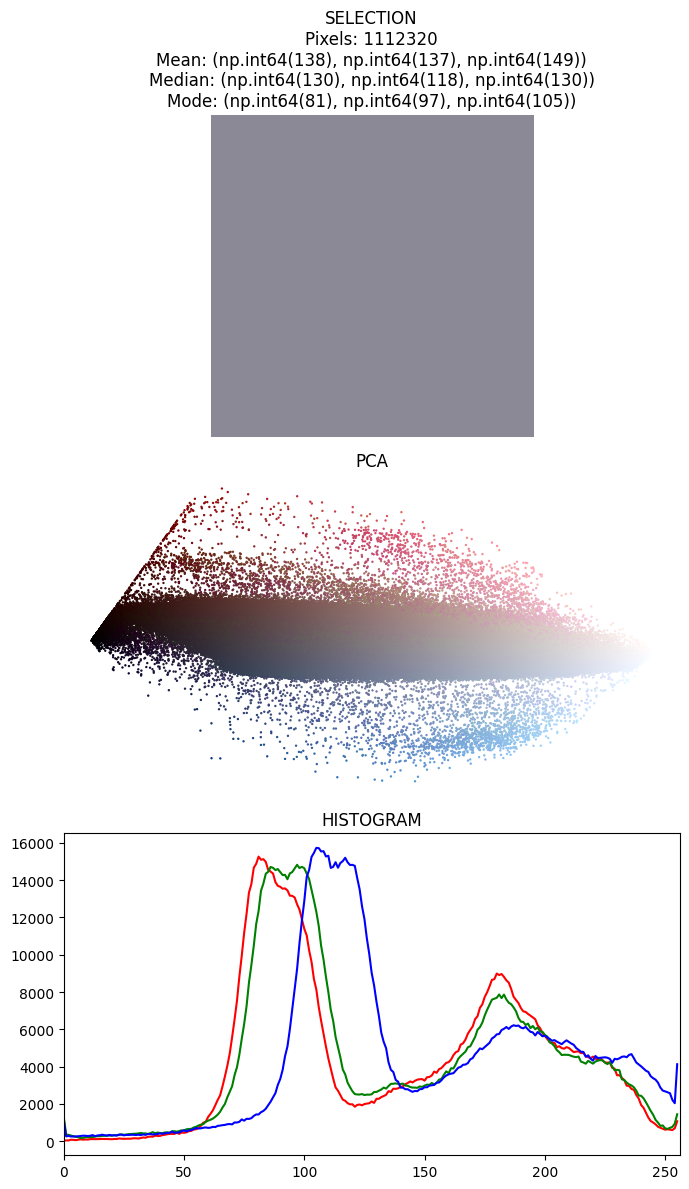

In [8]:
# Baca gambar
img = cv2.imread('original.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
pixels = img_rgb.reshape(-1, 3)

# Statistik dasar
mean = np.mean(pixels, axis=0).astype(int)
median = np.median(pixels, axis=0).astype(int)
mode = np.argmax(np.bincount(pixels[:,0])), np.argmax(np.bincount(pixels[:,1])), np.argmax(np.bincount(pixels[:,2]))

print(f"Pixels: {pixels.shape[0]}")
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode (approx): {mode}")

# PCA untuk visualisasi distribusi warna
pca = PCA(n_components=2)
pca_result = pca.fit_transform(pixels)

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(7, 12))

# Plot statistik warna sebagai patch
axs[0].set_title(f'SELECTION\nPixels: {pixels.shape[0]}\nMean: {tuple(mean)}\nMedian: {tuple(median)}\nMode: {mode}')
axs[0].imshow([[mean / 255]])
axs[0].axis('off')

# PCA Scatter
axs[1].set_title("PCA")
axs[1].scatter(pca_result[:, 0], pca_result[:, 1], c=pixels / 255, s=0.5)
axs[1].axis('off')

# Histogram per channel
axs[2].set_title("HISTOGRAM")
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    hist = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
    axs[2].plot(hist, color=color)
    axs[2].set_xlim([0, 256])

plt.tight_layout()
plt.show()


Pixels: 1112320
Mean: [138 137 149]
Median: [130 118 130]
Mode (approx): (np.int64(81), np.int64(97), np.int64(105))


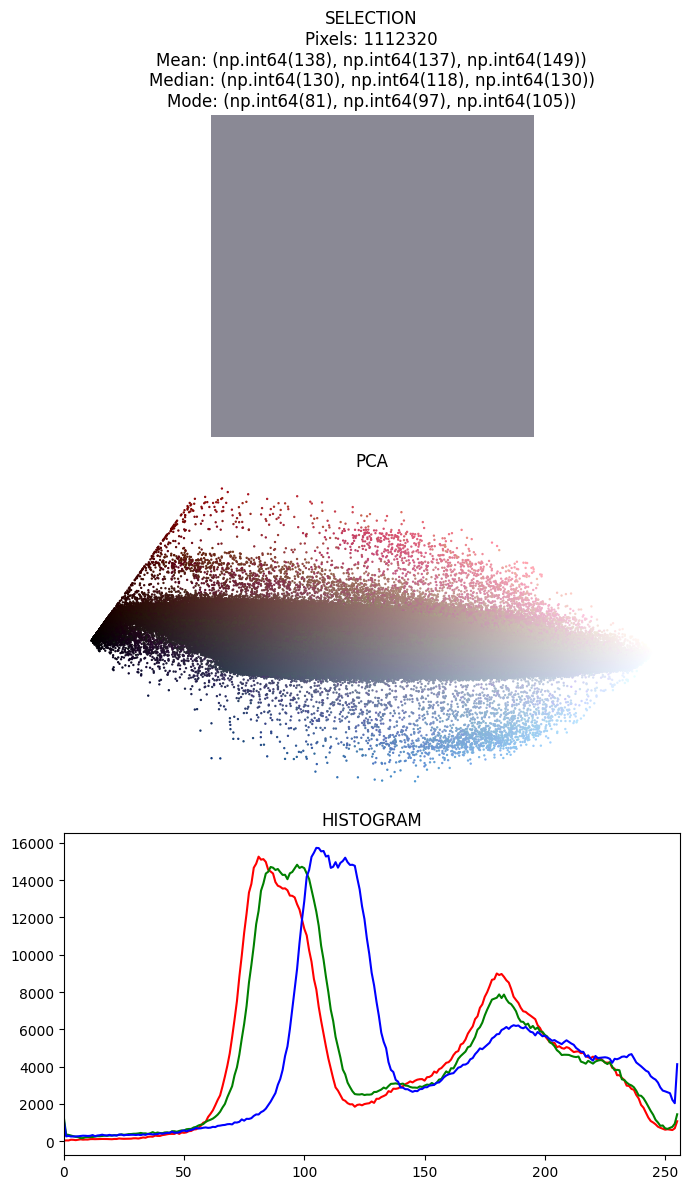

In [9]:
# Baca gambar
img = cv2.imread('encoded.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
pixels = img_rgb.reshape(-1, 3)

# Statistik dasar
mean = np.mean(pixels, axis=0).astype(int)
median = np.median(pixels, axis=0).astype(int)
mode = np.argmax(np.bincount(pixels[:,0])), np.argmax(np.bincount(pixels[:,1])), np.argmax(np.bincount(pixels[:,2]))

print(f"Pixels: {pixels.shape[0]}")
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode (approx): {mode}")

# PCA untuk visualisasi distribusi warna
pca = PCA(n_components=2)
pca_result = pca.fit_transform(pixels)

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(7, 12))

# Plot statistik warna sebagai patch
axs[0].set_title(f'SELECTION\nPixels: {pixels.shape[0]}\nMean: {tuple(mean)}\nMedian: {tuple(median)}\nMode: {mode}')
axs[0].imshow([[mean / 255]])
axs[0].axis('off')

# PCA Scatter
axs[1].set_title("PCA")
axs[1].scatter(pca_result[:, 0], pca_result[:, 1], c=pixels / 255, s=0.5)
axs[1].axis('off')

# Histogram per channel
axs[2].set_title("HISTOGRAM")
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    hist = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
    axs[2].plot(hist, color=color)
    axs[2].set_xlim([0, 256])

plt.tight_layout()
plt.show()
